In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Fish.csv')

In [3]:
dataset.rename(columns={'Length1' :'Body Height', 'Length2' : 'Total Length', 'Length3' : 'Diagonal Length'} , inplace= True)

In [4]:
dataset.head(10)

,Species,Weight,Body Height,Total Length,Diagonal Length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [5]:
dataset.tail(10)

,Species,Weight,Body Height,Total Length,Diagonal Length,Height,Width
149,Smelt,9.8,10.7,11.2,12.4,2.0832,1.2772
150,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852
151,Smelt,10.0,11.3,11.8,13.1,2.2139,1.2838
152,Smelt,9.9,11.3,11.8,13.1,2.2139,1.1659
153,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


                                      Investigating the Dataset

                        Check if the Dataset contains an empty value or missing value and also it datatype

In [6]:
for empty in dataset.columns:
    
    print('Am Column {} with {} missing values and {} datatype'.format(empty,dataset[empty].isnull().sum(),
                                                                       dataset[empty].dtype))

Am Column Species with 0 missing values and object datatype
Am Column Weight with 0 missing values and float64 datatype
Am Column Body Height with 0 missing values and float64 datatype
Am Column Total Length with 0 missing values and float64 datatype
Am Column Diagonal Length with 0 missing values and float64 datatype
Am Column Height with 0 missing values and float64 datatype
Am Column Width with 0 missing values and float64 datatype


In [7]:
dataset.describe()

,Weight,Body Height,Total Length,Diagonal Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [8]:
dataset.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

Based on the value_counts above it seems whitefish is least represented here, let visualize it with a histogram

                                 Histogram for the distribution of the 7-Species

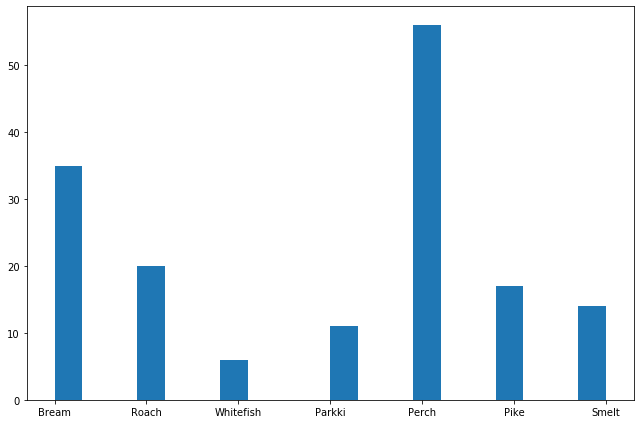

In [9]:
dataset.Species.hist(bins = 20, grid = False, xlabelsize= 10, ylabelsize= 10, linewidth = 3.0)
plt.tight_layout(rect=(0, 0, 1.5, 1.5))   


(array([0.08571429, 0.        , 0.        , 0.08571429, 0.08571429,
        0.        , 0.08571429, 0.        , 0.08571429, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.08571429, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.08571429]),
 array([ 6.        ,  7.66666667,  9.33333333, 11.        , 12.66666667,
        14.33333333, 16.        , 17.66666667, 19.33333333, 21.        ,
        22.66666667, 24.33333333, 26.        , 27.66666667, 29.33333333,
        31.        , 32.66666667, 34.33333333, 36.        , 37.66666667,
        39.33333333, 41.        , 42.66666667, 44.33333333, 46.        ,
        47.66666667, 49.33333333, 51.        , 52.66666667, 54.33333333,
        56.        ]),
 <a list of 30 Patch objects>)

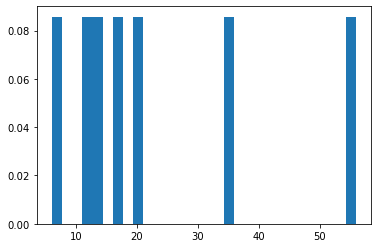

In [10]:
plt.hist(dataset.Species.value_counts(), bins =30, normed = True)

                                   Visualiziung Independent variable as a 1D data 

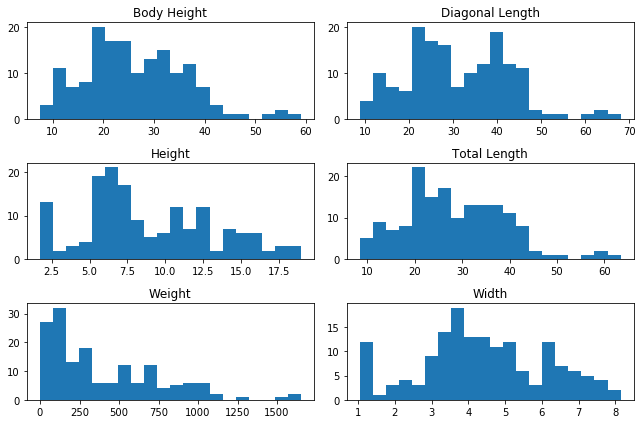

In [11]:

dataset.hist(bins = 20, grid = False, xlabelsize= 10, ylabelsize= 10, linewidth = 3.0)
plt.tight_layout(rect=(0, 0, 1.5, 1.5))  

                          Checking the correlation between the variables 

In [12]:
corr = dataset.corr()
corr

,Weight,Body Height,Total Length,Diagonal Length,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Body Height,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Total Length,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Diagonal Length,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


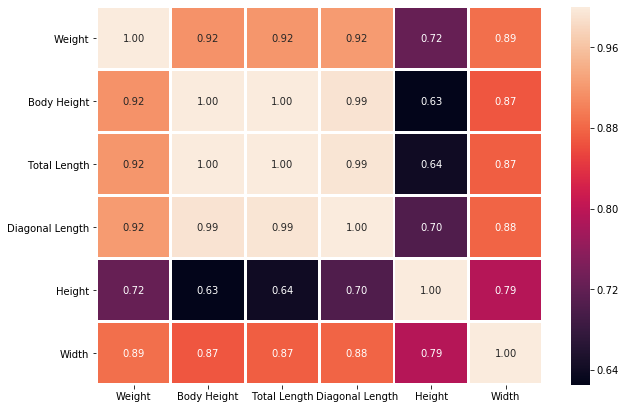

In [13]:
f, ax = plt.subplots(figsize=(10,6))
sbn.heatmap(corr, annot=True, ax = ax, linewidths=1.9, fmt='1.2f')
f.subplots_adjust(top = 1)

               The above heatmap show the how the six variable correlate with the weight of the fishies

                                     *Diving into Data cleaning and modeling* 

In [14]:
# dividing the dataset into X and Y category
features = ['Species','Body Height', 'Total Length', 'Diagonal Length', 'Height', 'Width']
x = dataset[features]
y = dataset['Weight']
#y = dataset.Weight   another way of getting the column value of weight
x

,Species,Body Height,Total Length,Diagonal Length,Height,Width
0,Bream,23.2,25.4,30.0,11.5200,4.0200
1,Bream,24.0,26.3,31.2,12.4800,4.3056
2,Bream,23.9,26.5,31.1,12.3778,4.6961
3,Bream,26.3,29.0,33.5,12.7300,4.4555
4,Bream,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,13.2,14.3,15.2,2.8728,2.0672


  Since we have no missing values, we go straight into checking for linearity of the datasets and encoding the categorical data 

### it is adviceable to validate that certain assumptions are met in terms of the dataset, we will pick two independent variables and check there linearity with the dependent variable

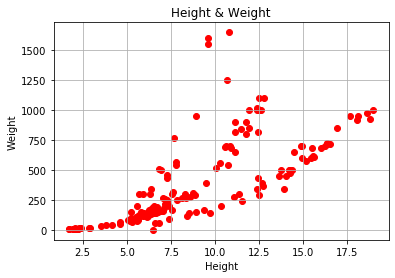

In [15]:
plt.scatter(x['Height'],y, color = 'red')
plt.title('Height & Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid(True)

In [16]:
x

,Species,Body Height,Total Length,Diagonal Length,Height,Width
0,Bream,23.2,25.4,30.0,11.5200,4.0200
1,Bream,24.0,26.3,31.2,12.4800,4.3056
2,Bream,23.9,26.5,31.1,12.3778,4.6961
3,Bream,26.3,29.0,33.5,12.7300,4.4555
4,Bream,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,13.2,14.3,15.2,2.8728,2.0672


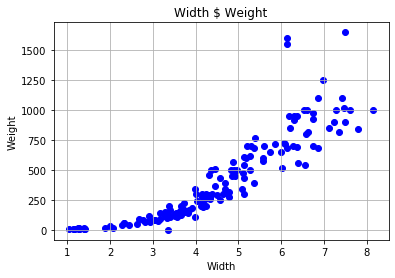

In [17]:
plt.scatter(x['Width'],y , color = ['blue'])
plt.title('Width $ Weight')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.grid(True)

As we can see there exist a linear relationship between these variable in each case.

1. in the case of the height, the fishes gain more weight as they grow in height, but the weight gain isnt the same in all species, some has a sharp weight rise as they gain little gain, while some are gradual.

2. whiles in the case of the width of the fishes there seems to be a uniform weight gain rate between the species.

we will be transforming the categorical data with the help of columntransformer

In [18]:
encode = preprocessing.LabelEncoder()
x['Species']= encode.fit_transform(x['Species'])

transformer = ColumnTransformer([('transfor', OneHotEncoder(), ['Species'] )],  remainder = 'passthrough')
x=  np.array(transformer.fit_transform(x), dtype = np.float)

In [19]:
x.shape

(159, 12)

In [20]:
x = pd.DataFrame(x)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

         As a precaution we are going to drop one of the dummy variable to avoid the dummy variable trap

In [21]:
x = x.drop(columns = [0])


In [22]:

x.columns=['Perkki' ,'Perch','Piki' ,'Roach', 'Smelt', 'Whitefish', 'Body Height',  'Total Length',  'Diagonal Length', 
           'Height', 'Width']

In [23]:
x.shape

(159, 11)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
ran_reg = RandomForestRegressor(n_estimators = 20, random_state= 0)
lin_reg = LinearRegression()  
lin_reg.fit(X_train, Y_train)
ran_reg.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [25]:
y_pred = lin_reg.predict(X_test)
y_ran_pred = ran_reg.predict(X_test)
y_pred_error = mean_absolute_error(Y_test , y_pred)
y_ran_error = mean_absolute_error(Y_test, y_ran_pred)
y_pred_r2_score = r2_score(Y_test, y_pred)
y_ran_r2_score = r2_score(Y_test, y_ran_pred)


In [26]:
print('Result of using a Linear Regression Model\n',
      y_pred,'\n..............................................\n')
print('Result of using a Random Forest Regression Model\n',y_ran_pred)

Result of using a Linear Regression Model
 [ 428.88533577   98.08363614  216.67998922  208.66936638  657.24094116
  876.38855413  665.97861965  407.27203048  965.65306863  146.62291102
  255.15532231  561.63685124  765.67575361 1012.38234027 -118.72798063
   14.47341216  137.60789564 1155.53572308  170.97092949  724.93548455
 -128.48675188  525.45508599  175.3519065  1322.74816983  -23.0873263
  475.44172778  719.96841977  280.94571114  885.12085107  -16.63412226
  585.26038657  164.22863371] 
..............................................

Result of using a Random Forest Regression Model
 [ 406.9    126.5    167.75   153.5    670.7    945.75   709.75   331.25
  988.     113.6    306.75   482.25   953.    1050.75    55.595   90.7
  146.    1445.     125.25   710.95    50.69   552.5    130.25  1342.5
   80.875  458.25   685.45   276.2    973.5      8.25   655.5    118.8  ]


In [27]:
y_ran_pred

array([ 406.9  ,  126.5  ,  167.75 ,  153.5  ,  670.7  ,  945.75 ,
        709.75 ,  331.25 ,  988.   ,  113.6  ,  306.75 ,  482.25 ,
        953.   , 1050.75 ,   55.595,   90.7  ,  146.   , 1445.   ,
        125.25 ,  710.95 ,   50.69 ,  552.5  ,  130.25 , 1342.5  ,
         80.875,  458.25 ,  685.45 ,  276.2  ,  973.5  ,    8.25 ,
        655.5  ,  118.8  ])

In [28]:
y_pred_error

88.69881474243417

In [29]:
y_ran_error

47.7528125

In [30]:
y_pred_r2_score

0.9102350316202603

In [31]:
y_ran_pred

array([ 406.9  ,  126.5  ,  167.75 ,  153.5  ,  670.7  ,  945.75 ,
        709.75 ,  331.25 ,  988.   ,  113.6  ,  306.75 ,  482.25 ,
        953.   , 1050.75 ,   55.595,   90.7  ,  146.   , 1445.   ,
        125.25 ,  710.95 ,   50.69 ,  552.5  ,  130.25 , 1342.5  ,
         80.875,  458.25 ,  685.45 ,  276.2  ,  973.5  ,    8.25 ,
        655.5  ,  118.8  ])

In [32]:
Y_test




7      390.0 
40     0.0   
95     170.0 
45     160.0 
110    556.0 
120    900.0 
59     800.0 
131    300.0 
33     975.0 
83     115.0 
128    200.0 
134    456.0 
60     1000.0
126    1000.0
62     60.0  
37     78.0  
44     145.0 
142    1600.0
85     130.0 
26     720.0 
61     55.0  
54     390.0 
86     120.0 
144    1650.0
63     90.0  
8      450.0 
24     700.0 
56     270.0 
119    850.0 
148    9.7   
19     650.0 
90     110.0 
Name: Weight, dtype: float64